In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import nbinom

In [20]:
# state matrix
num_patches=100
patch_pop=500
initial_inf=10

# epiphenomological parameter??
alpha=0.97
# disease infectiousness
beta = 0.9
recovery = 1
ITERS =20 


# setup matrix
# rows are patches, columns are S,I,R
disease_matrix = np.zeros((num_patches,3))
disease_matrix[:,0]=patch_pop-initial_inf
disease_matrix[:,1]=initial_inf

# simulation results characterized by a sequence of matrices
disease_matrix_ts = [disease_matrix]
delta_I_ts = [disease_matrix[:,1]]

In [25]:
# main loop of disease spread simulation
for i in range(0,ITERS):
    last_matrix = disease_matrix_ts[i]
    S_t = last_matrix[:,0]
    I_t = last_matrix[:,1]
    R_t = last_matrix[:,2]
    # compute lambda for each row
    lmbda_t = beta*S_t*I_t**(alpha)/patch_pop
    # parameterize negative binomial (can be simplified..)
    p = np.zeros(len(I_t))
    n = I_t
    for j in range(0,len(I_t)):
        if I_t[j] > 0:
            variance= lmbda_t[j] + (1/I_t[j])*(lmbda_t[j]**2)
            p[j] = lmbda_t[j]/variance
        else:
            p[j] = None
    print(p,n)
    # note: I think this is a delta (change in infections)...
    delta_I_t = np.zeros(num_patches)
    # bad and lazy way for dealing with NaNs once number of infections reaches 0.
    # just do it before the probabilities are sampled
    # to avoid all these errors.
    for j in range(0,num_patches):
        if math.isnan(p[j]):
            delta_I_t[j] = nbinom.rvs(n[j],p[j])
        else:
            delta_I_t[j] = 0
    print(delta_I_t)
    delta_I_ts.append(delta_I_t)
    next_S = S_t - delta_I_t
    if i >= (recovery-1): # infections that were introduced 'recovery' steps ago should now be removed from I
        recovered = delta_I_ts[-(recovery+1)]
        recovered = np.maximum(recovered,I_t+next_I)
    else:
        recovered = 0
    next_matrix = np.array([next_S,
                            next_I+delta_I_t-recovered,
                            R_t+recovered]).T
    disease_matrix_ts.append(next_matrix)

[0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715
 0.54850715 0.54850715 0.54850715 0.54850715 0.54850715 0.5485

C:\Users\nrw5cq\AppData\Local\Temp\ipykernel_12940\1660054346.py:8: RuntimeWarning: invalid value encountered in power
  lmbda_t = beta*S_t*I_t**(alpha)/patch_pop


ValueError: Domain error in arguments.

<AxesSubplot:>

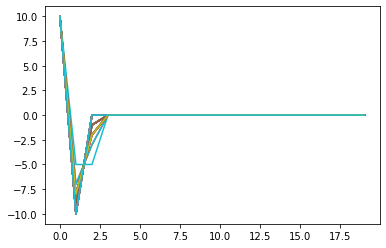

In [7]:
np.array([disease_matrix_ts[k][:,1] for k in range(0,ITERS)])
pd.DataFrame(np.array([disease_matrix_ts[k][:,1] for k in range(0,ITERS)])).plot(legend=False)

In [26]:
from untitled import random_network

ModuleNotFoundError: No module named 'untitled'